In [0]:
import numpy as np # MATRIX OPERATIONS
import pandas as pd # EFFICIENT DATA STRUCTURES
import matplotlib.pyplot as plt # GRAPHING AND VISUALIZATIONS
import math # MATHEMATICAL OPERATIONS
import cv2 # IMAGE PROCESSING - OPENCV
from glob import glob # FILE OPERATIONS
import itertools
import os
from zipfile import ZipFile


# KERAS AND SKLEARN MODULES
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.python.framework import ops
ops.reset_default_graph()

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 16
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# GLOBAL VARIABLES
SCALE = 70
SEED = 7
np.random.seed(SEED)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
project_path = "/content/drive/My Drive/Colab Notebooks/weed/"

In [0]:
with ZipFile(project_path+'train.zip', 'r') as zip:
  zip.extractall()

In [0]:
with ZipFile(project_path+'test.zip', 'r') as zip:
  zip.extractall()

# Read the images and generate the train and test dataset 

In [0]:
import os
from glob import glob

In [10]:
#List of Classes/Labels
os.listdir("./train")

['Scentless Mayweed',
 'Charlock',
 'Cleavers',
 'Sugar beet',
 'Black-grass',
 'Maize',
 'Fat Hen',
 'Shepherds Purse',
 'Loose Silky-bent',
 'Small-flowered Cranesbill',
 'Common wheat',
 'Common Chickweed']

In [11]:
os.listdir("./test")

['c0f5d9ac8.png',
 'ef02b4ee7.png',
 '1d321253f.png',
 'a2b703e21.png',
 'f8318faf1.png',
 '5ca0205f9.png',
 '93079d970.png',
 'caa2fbd79.png',
 '5779fe8b4.png',
 'ef65533d5.png',
 'c1ecff98b.png',
 '0e8492cb1.png',
 'b0acaff4a.png',
 '1b6a6494d.png',
 '8d6991365.png',
 'a800caead.png',
 'beebe5f4e.png',
 '77ccb8b2a.png',
 '5e6a237f2.png',
 '958bb9e96.png',
 '39858776a.png',
 'f66ae4070.png',
 '8b043093d.png',
 'f3fcfff1b.png',
 '38c054379.png',
 '1c52ea820.png',
 '35cf9fa01.png',
 '599691cd9.png',
 'ab35453cb.png',
 'dabe3e5be.png',
 '3bbef3ecb.png',
 '13b9fa92d.png',
 '25fa8d109.png',
 '5bbc0a255.png',
 '33748968f.png',
 '4c5ab9b68.png',
 'b828443ff.png',
 'f4ad9d950.png',
 '6be169e41.png',
 'a169b71e7.png',
 '41f1c3cdb.png',
 '61dd2cdc5.png',
 'a8b431a3e.png',
 'fea3da57c.png',
 '699d3c707.png',
 'e15fce4f2.png',
 'c75a82234.png',
 '2ff5cb348.png',
 '1c680883c.png',
 '728eabae1.png',
 '0021e90e4.png',
 '8e3ed0a25.png',
 'cf3a8b2fd.png',
 'ae90f2827.png',
 '87f627bf9.png',
 '756dd507

In [0]:
#path_to_images_train = 'plant_seedlings/train/*/*.png'
#path_to_images_test = 'plant_seedlings/test/*.png'
path_to_images_train = 'train/*/*.png'
path_to_images_test = 'test/*.png'

images_train = glob(path_to_images_train)
images_test  = glob(path_to_images_test)

trainingset = []
traininglabels = []
testset = []
tests = []

num_train = len(images_train)
num_test  = len(images_test)


In [13]:
print(num_train)
print(num_test)

4750
794


In [14]:
#READING IMAGES AND RESIZING THEM
count = 1
for i in images_train:
    print(str(count)+'/'+str(num_train),end='\r')
    trainingset.append(cv2.resize(cv2.imread(i),(SCALE,SCALE)))
    traininglabels.append(i.split('/')[-2])
    count = count + 1
trainingset = np.asarray(trainingset)
traininglabels = pd.DataFrame(traininglabels)


In [15]:
#Number of training images
print(num_train, len(trainingset), len(traininglabels))

4750 4750 4750


In [16]:
count = 1
for i in images_test:
    print(str(count)+'/'+str(num_test),end='\r')
    tests.append(i.split('/')[-1])
    testset.append(cv2.resize(cv2.imread(i),(SCALE,SCALE)))
    count = count + 1
testset = np.asarray(testset)


In [17]:
#Number of test images
print(num_test, len(testset))

794 794


(194, 194, 3) (70, 70, 3)


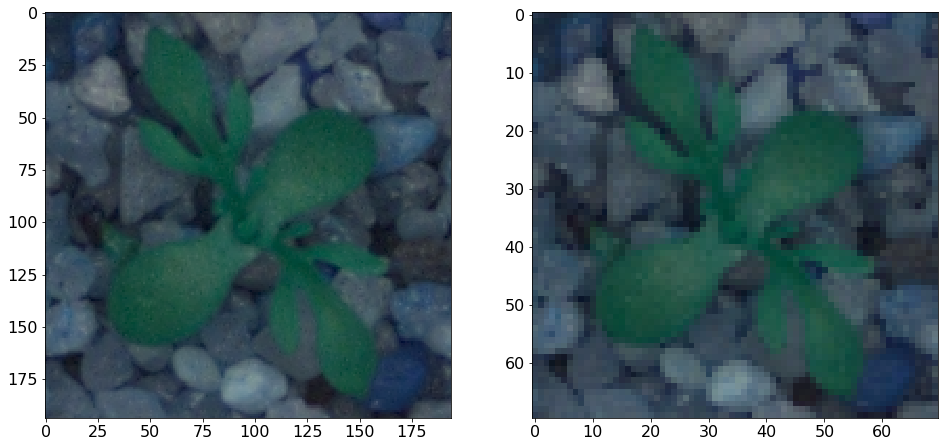

In [18]:
#View one sample image
sample_image_scale = trainingset[1]
sample_image_orig = cv2.imread(images_train[1])
print(sample_image_orig.shape, sample_image_scale.shape)
plt.subplot(1,2,1)
plt.imshow(sample_image_orig)
plt.subplot(1,2,2)
plt.imshow(sample_image_scale)

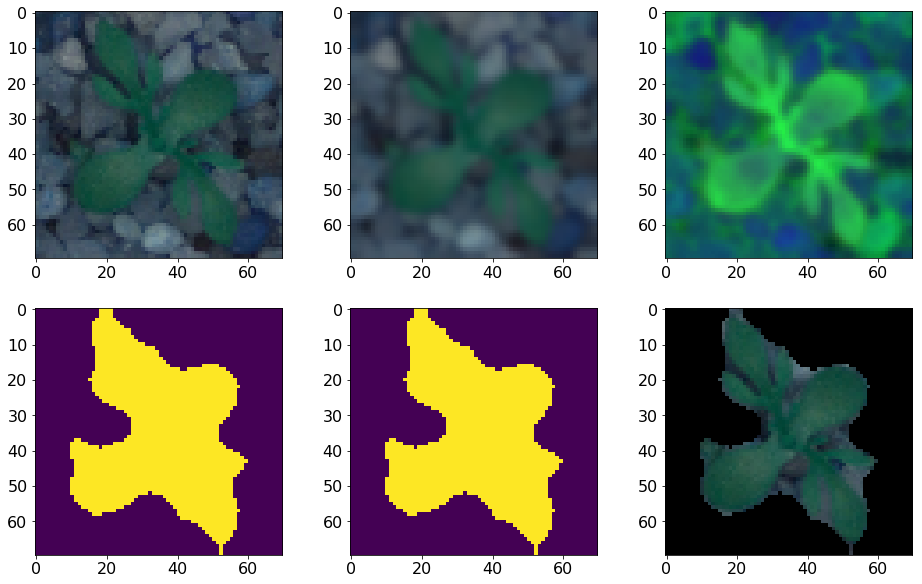

In [19]:
#Experiment preprocessing with one sample image
blurr = cv2.GaussianBlur(sample_image_scale,(5,5),0)
hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
#GREEN PARAMETERS
lower = (25,40,50)
upper = (75,255,255)
mask = cv2.inRange(hsv,lower,upper)
struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
boolean = mask>0
new = np.zeros_like(sample_image_scale,np.uint8)
new[boolean] = sample_image_scale[boolean]
plt.subplot(2,3,1);plt.imshow(sample_image_scale) # ORIGINAL
plt.subplot(2,3,2);plt.imshow(blurr) # BLURRED
plt.subplot(2,3,3);plt.imshow(hsv) # HSV CONVERTED
plt.subplot(2,3,4);plt.imshow(mask) # MASKED
plt.subplot(2,3,5);plt.imshow(boolean) # BOOLEAN MASKED
plt.subplot(2,3,6);plt.imshow(new) # NEW PROCESSED IMAGE
plt.show()

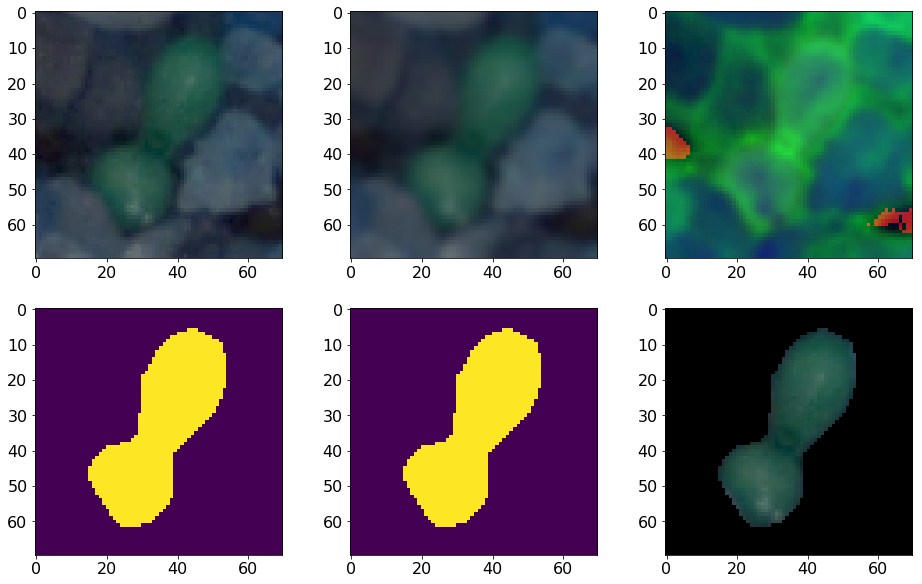

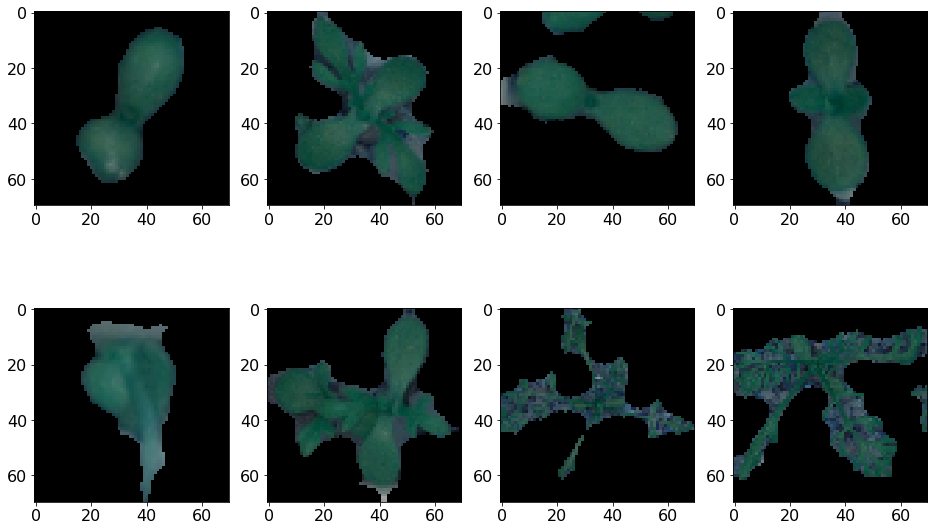

In [20]:
new_train = []
sets = []; getEx = True
for i in trainingset:
    blurr = cv2.GaussianBlur(i,(5,5),0)
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
    #GREEN PARAMETERS
    lower = (25,40,50)
    upper = (75,255,255)
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    new_train.append(new)
    
    if getEx:
        plt.subplot(2,3,1);plt.imshow(i) # ORIGINAL
        plt.subplot(2,3,2);plt.imshow(blurr) # BLURRED
        plt.subplot(2,3,3);plt.imshow(hsv) # HSV CONVERTED
        plt.subplot(2,3,4);plt.imshow(mask) # MASKED
        plt.subplot(2,3,5);plt.imshow(boolean) # BOOLEAN MASKED
        plt.subplot(2,3,6);plt.imshow(new) # NEW PROCESSED IMAGE
        plt.show()
        getEx = False
new_train = np.asarray(new_train)

# CLEANED IMAGES
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(new_train[i])

# Divide the data set into Train and validation data sets

In [0]:
#Normalize and split into train/validation set
new_train = new_train/255
x_train,x_test,y_train,y_test = train_test_split(new_train,clearalllabels,test_size=0.1,
                                                 random_state=SEED,stratify=clearalllabels)

In [23]:
print(len(x_train),len(x_test))

4275 475


# Initialize & build the model

In [24]:
#Define and train the base model 
EPOCHS=15
BATCH_SIZE=75

base_model = Sequential()

base_model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(SCALE, SCALE, 3), activation='relu'))
base_model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
base_model.add(MaxPooling2D((2, 2)))
base_model.add(BatchNormalization(axis=3))
base_model.add(Dropout(0.1))

base_model.add(Flatten())

base_model.add(Dense(classes, activation='softmax'))

base_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

base_model.summary()
base_model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test))








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 66, 66, 64)        4864      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61504)             0       

# Optimize the model

In [0]:
#Base model is heavily overfitting with high training accuracy and low validation accuracy. 
#Optimize the model exploring on the following: 
#1) Batch Normalization to transform inputs to be mean zero and unit variance for regularization. 
#2) Max pooling to provide abstracted form by down-sampling/reducing dimensionality. 
#3) Drop out layer to randomly ignore randomly selected neurons for regularization


#One such experimented architecture is provided below. 

In [26]:
#Define the model architecture
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(SCALE, SCALE, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 66, 66, 64)        4864      
_________________________________________________________________
batch_normalization_2 (Batch (None, 66, 66, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 31, 31, 64)        256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 27, 27, 128)      

In [0]:
# SETTING UP CHECKPOINTS, CALLBACKS AND REDUCING LEARNING RATE
lrr = ReduceLROnPlateau(monitor='val_acc', 
                        patience=3, 
                        verbose=2, 
                        factor=0.4, 
                        min_lr=0.00001)

filepath="weights.best_{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoints = ModelCheckpoint(filepath, monitor='val_acc', 
                              verbose=2, save_best_only=True, mode='max')
filepath="weights.last_auto4.hdf5"
checkpoints_full = ModelCheckpoint(filepath, monitor='val_acc', 
                                 verbose=2, save_best_only=False, mode='max')

callbacks_list = [checkpoints, lrr, checkpoints_full]

In [0]:
generator = ImageDataGenerator(rotation_range = 180,zoom_range = 0.1,width_shift_range = 0.1,
                               height_shift_range = 0.1,horizontal_flip = True,vertical_flip = True)
generator.fit(x_train)

In [29]:
# Store Training Results
import datetime 

datetime.datetime.now().strftime("%d.%b %Y %H:%M:%S")
EPOCHS=10
BATCH_SIZE=35

# Fit the model on batches with real-time data augmentation:
model.fit_generator(generator.flow(x_train, y_train, batch_size=BATCH_SIZE), steps_per_epoch=len(x_train) / BATCH_SIZE, 
                    epochs=EPOCHS, validation_data=(x_test, y_test), callbacks=callbacks_list)


datetime.datetime.now().strftime("%d.%b %Y %H:%M:%S")

'06.Oct 2019 17:34:13'

Epoch 1/10
123/122 [==============================] - 18s 145ms/step - loss: 2.5267 - acc: 0.2829 - val_loss: 3.1014 - val_acc: 0.3895

Epoch 00001: val_acc improved from -inf to 0.38947, saving model to weights.best_01-0.39.hdf5

Epoch 00001: saving model to weights.last_auto4.hdf5
Epoch 2/10
123/122 [==============================] - 14s 112ms/step - loss: 1.9494 - acc: 0.3870 - val_loss: 3.3054 - val_acc: 0.3747

Epoch 00002: val_acc did not improve from 0.38947

Epoch 00002: saving model to weights.last_auto4.hdf5
Epoch 3/10
123/122 [==============================] - 14s 112ms/step - loss: 1.6899 - acc: 0.4316 - val_loss: 1.4981 - val_acc: 0.4611

Epoch 00003: val_acc improved from 0.38947 to 0.46105, saving model to weights.best_03-0.46.hdf5

Epoch 00003: saving model to weights.last_auto4.hdf5
Epoch 4/10
123/122 [==============================] - 14s 113ms/step - loss: 1.4836 - acc: 0.4822 - val_loss: 1.8715 - val_acc: 0.5095

Epoch 00004: val_acc improved from 0.46105 to 0.50947

'06.Oct 2019 17:36:42'

In [30]:
print(model.evaluate(x_train, y_train))  # Evaluate on train set

4275/4275 [==============================] - 4s 997us/step
[0.7883343319307293, 0.7251461987885816]


In [31]:
print(model.evaluate(x_test, y_test))  # Evaluate on test set

475/475 [==============================] - 1s 1ms/step
[0.875038245100724, 0.7010526305750797]


# Predict the accuracy for both train and validation data

In [32]:
# PREDICTIONS
y_pred = model.predict(x_test)
y_class = np.argmax(y_pred, axis = 1) 
y_check = np.argmax(y_test, axis = 1) 

#Print confusion matrix
cmatrix = confusion_matrix(y_check, y_class)
print(cmatrix)

[[ 0  0  0  0  0  1 24  1  0  0  0  0]
 [ 0 33  1  0  0  0  0  4  1  0  0  0]
 [ 0  7 19  0  0  0  0  3  0  0  0  0]
 [ 0  0  0 53  0  0  0  1  0  4  2  1]
 [ 0  0  3  0  8  1  7  0  1  0  0  2]
 [ 0  5  0  3  0 30  0  0  2  2  1  4]
 [ 0  0  0  0  0  1 62  0  2  0  0  0]
 [ 0  0  0  2  0  0  0 18  1  1  0  0]
 [ 0  1  0  2  0  0  0 19 28  0  0  2]
 [ 0  3  0  3  0  0  0  0  4 12  1  0]
 [ 0  2  0  0  0  0  0  0  0  0 47  1]
 [ 0  0  0  0  0  0  0  1  2  0 13 23]]
